In [2]:
%matplotlib inline
from glob import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

from utils import EchelleSpectrum, continuum_normalize, plot_spectrum

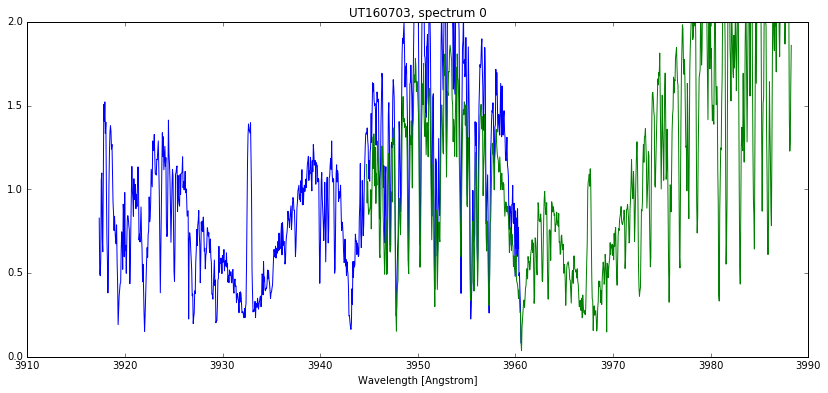

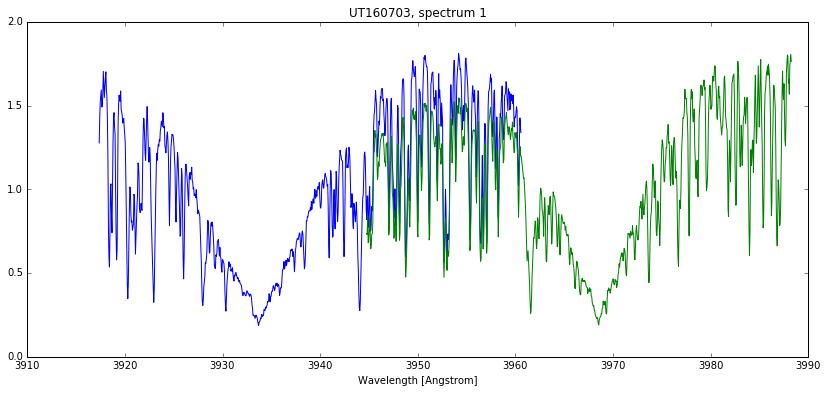

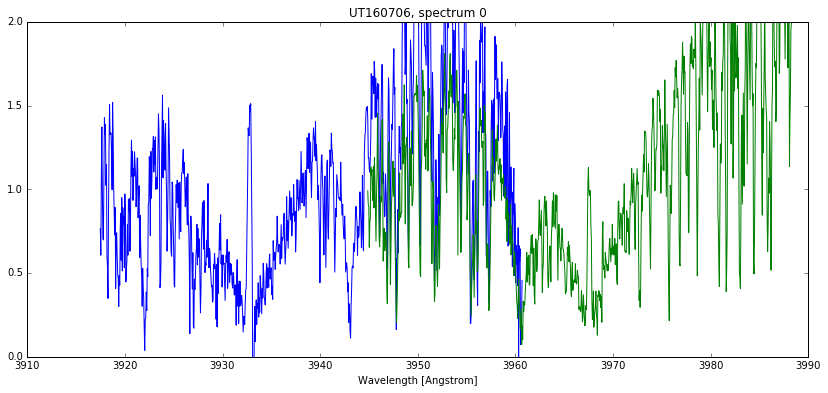

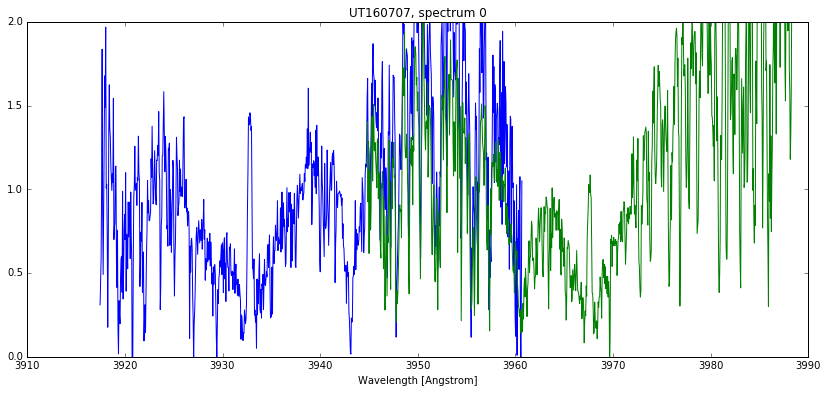

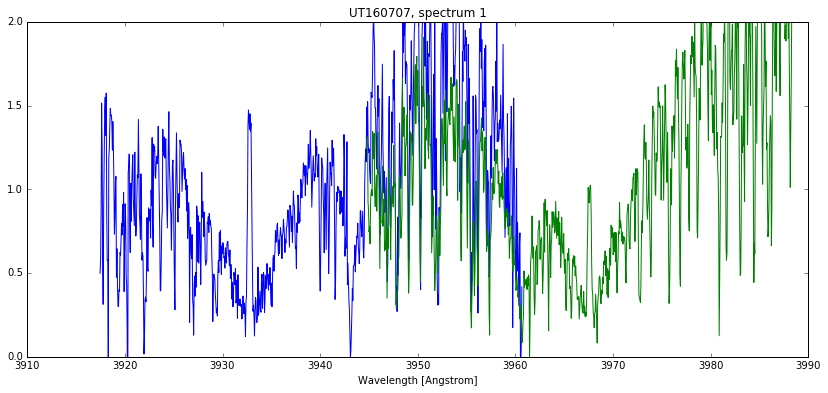

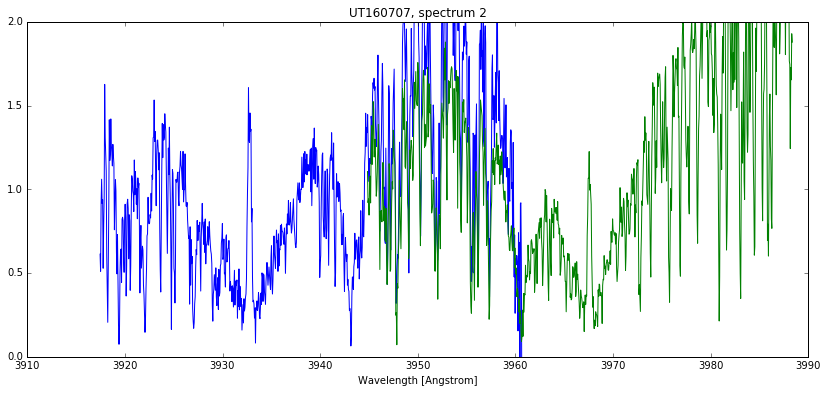

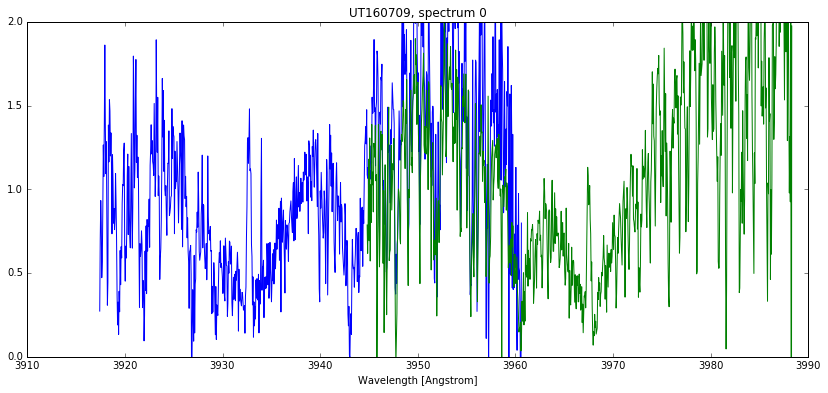

In [63]:
root_dir = '/media/PASSPORT/APO/Q3UW04/'
dates = ['UT160703', 'UT160706', 'UT160707', 'UT160709']
standard = 'BD28_4211'

all_normalized_spectra = []

date_index = 0
for date_index in range(len(dates)):
    data_dir = os.path.join(root_dir, dates[date_index])
    hat11_spectra_paths = glob(os.path.join(data_dir, 'HAT*.wfrmcpc.fits'))
    standard_spectra_paths = glob(os.path.join(data_dir, 
                                               "{0}*.wfrmcpc.fits".format(standard)))

    for spectrum_index in range(len(hat11_spectra_paths)):
        
        # Skip one bad observation:
        if not (spectrum_index == 3 and dates[date_index] == 'UT160707'):
            
            hat11_spectrum = EchelleSpectrum.from_fits(hat11_spectra_paths[spectrum_index])
            standard_spectrum = EchelleSpectrum.from_fits(standard_spectra_paths[0])

            normed_spectrum = continuum_normalize(hat11_spectrum, standard_spectrum, 
                                                  polynomial_order=8)
            all_normalized_spectra.append(normed_spectrum)
            
            plt.figure(figsize=(14, 6))
            plot_spectrum(normed_spectrum.get_order(90), margin=400)
            plot_spectrum(normed_spectrum.get_order(89), margin=400)
            plt.ylim([0, 2])
            plt.title('{0}, spectrum {1}'.format(dates[date_index], spectrum_index))
            plt.xlabel('Wavelength [Angstrom]')
            plt.show()

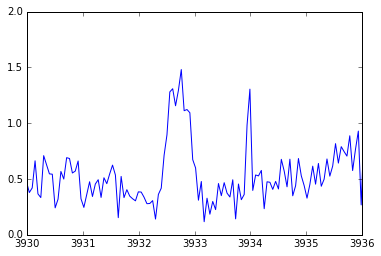

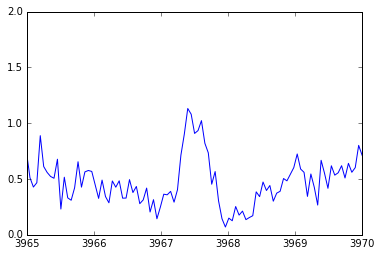

In [24]:
plot_spectrum(normed_spectrum.get_order(90), margin=400)
plt.xlim([3930, 3936])
plt.ylim([0, 2])
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.figure()
plot_spectrum(normed_spectrum.get_order(89), margin=400)
plt.xlim([3965, 3970])
plt.ylim([0, 2])
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

In [79]:
from scipy.optimize import fmin

approx_h = 3967.5 * u.Angstrom
approx_k = 3932.7 * u.Angstrom

def gaussian(p, x):
    x0, sigma, a, c = p
    return a * np.exp(-0.5 * (x - x0)**2 / sigma**2) + c

def chi2(p, x, y):
    return np.sum((gaussian(p, x) - y)**2)

#approx_h=approx_h
def equivalent_width_k(normalized_spectrum, approx_k=approx_k, 
                       background_width=1.5*u.Angstrom):
    spectrum = normalized_spectrum.get_order(90)
    near_core = np.abs(spectrum.wavelength - approx_k) < background_width
    wavelength = spectrum.wavelength[near_core]
    flux = spectrum.flux[near_core]
    
    # Normalize to the off-core flux:
    core_width = 0.5 * u.angstrom
    in_core = np.abs(wavelength - approx_k) < core_width
    flux /= np.median(flux[~in_core])

    core_flux = flux[in_core]
    core_wavelength = wavelength[in_core]
    
    fit_params = [approx_k.value, 0.15, 2.4, 1.0]
    
    result = fmin(chi2, fit_params, args=(wavelength.value, flux))
    gaussian_fit = gaussian(result, wavelength.value)
    
    plt.plot(wavelength, flux)
    plt.plot(wavelength, gaussian_fit, 'r')
    #plt.fill_between(core_wavelength.value, core_flux, 1.0, alpha=0.2)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.title('CaII K')
    
def equivalent_width_h(normalized_spectrum, approx_h=approx_h, 
                       background_width=1.5*u.Angstrom):
    spectrum = normalized_spectrum.get_order(89)
    near_core = np.abs(spectrum.wavelength - approx_h) < background_width
    wavelength = spectrum.wavelength[near_core]
    flux = spectrum.flux[near_core]
    
    # Normalize to the off-core flux:
    core_width = 0.5 * u.angstrom
    in_core = np.abs(wavelength - approx_k) < core_width
    flux /= np.median(flux[~in_core])

    core_flux = flux[in_core]
    core_wavelength = wavelength[in_core]
    
    fit_params = [approx_h.value, 0.15, 2.4, 1.0]
    
    result = fmin(chi2, fit_params, args=(wavelength.value, flux))
    gaussian_fit = gaussian(result, wavelength.value)
    
    plt.plot(wavelength, flux)
    plt.plot(wavelength, gaussian_fit, 'r')
    #plt.fill_between(core_wavelength.value, core_flux, 1.0, alpha=0.2)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.title('CaII H')
    

Optimization terminated successfully.
         Current function value: 4.522936
         Iterations: 381
         Function evaluations: 677
Optimization terminated successfully.
         Current function value: 5.519066
         Iterations: 117
         Function evaluations: 221
Optimization terminated successfully.
         Current function value: 19.220407
         Iterations: 435
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 8.941284
         Iterations: 447
         Function evaluations: 780
Optimization terminated successfully.
         Current function value: 7.698836
         Iterations: 366
         Function evaluations: 645
Optimization terminated successfully.
         Current function value: 7.277703
         Iterations: 398
         Function evaluations: 712
Optimization terminated successfully.
         Current function value: 14.579342
         Iterations: 295
         Function evaluations: 521


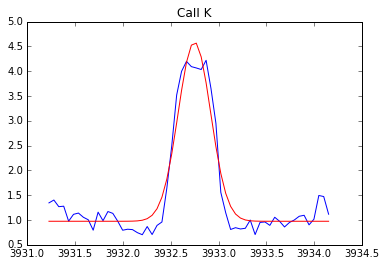

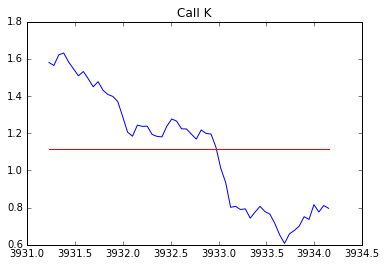

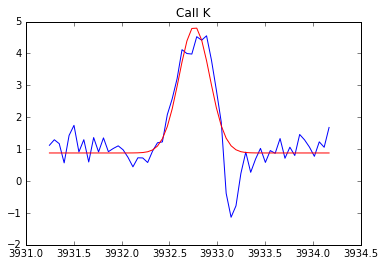

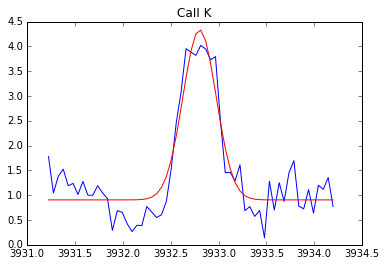

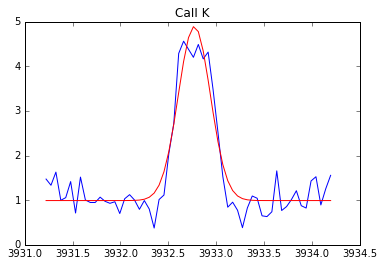

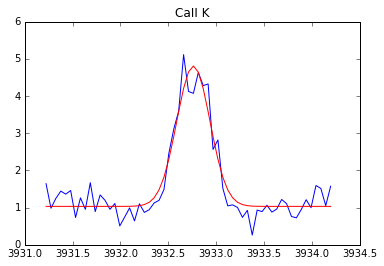

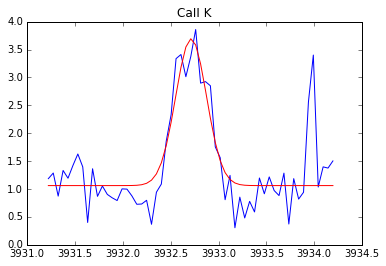

In [76]:
for spectrum in all_normalized_spectra:
    plt.figure()
    equivalent_width_k(spectrum)

Optimization terminated successfully.
         Current function value: 5.477837
         Iterations: 206
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 3.901704
         Iterations: 102
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 8.545664
         Iterations: 261
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 6.865156
         Iterations: 237
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 4.787210
         Iterations: 242
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 4.570588
         Iterations: 321
         Function evaluations: 571
Optimization terminated successfully.
         Current function value: 6.286341
         Iterations: 262
         Function evaluations: 477


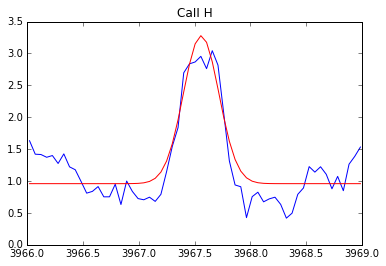

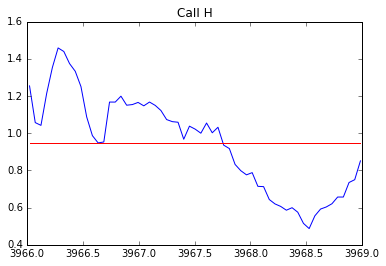

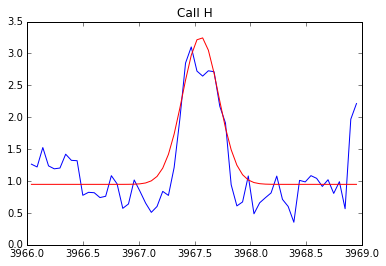

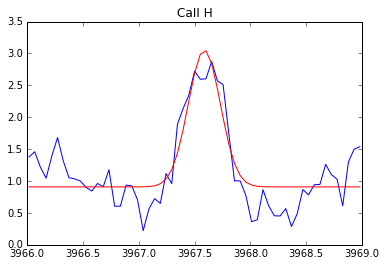

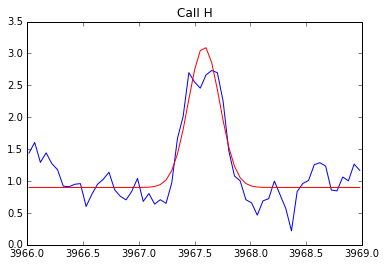

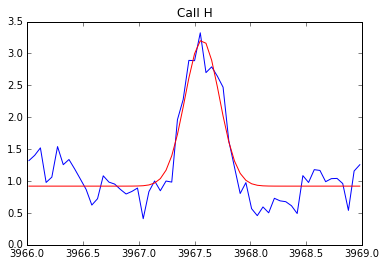

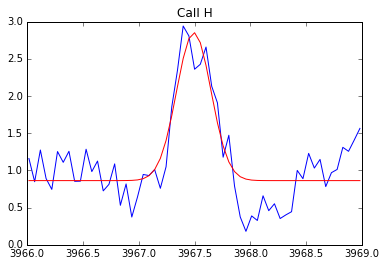

In [80]:

for spectrum in all_normalized_spectra:
    plt.figure()
    equivalent_width_h(spectrum)

***

In [97]:

from astropy.modeling.models import Voigt1D
from astropy.modeling import fitting

#t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5)
fit_model = fitting.LevMarLSQFitter()
#t = fit_t(t_init, x, y)

def equivalent_width_k(normalized_spectrum, approx_k=approx_k, 
                       background_width=1.5*u.Angstrom):
    spectrum = normalized_spectrum.get_order(90)
    near_core = np.abs(spectrum.wavelength - approx_k) < background_width
    wavelength = spectrum.wavelength[near_core]
    flux = spectrum.flux[near_core]
    
    # Normalize to the off-core flux:
    core_width = 0.5 * u.angstrom
    in_core = np.abs(wavelength - approx_k) < core_width
    flux /= np.median(flux[~in_core])

    init_params = Voigt1D(x_0=approx_k.value, amplitude_L=2.0, fwhm_L=0.2, fwhm_G=1.4)
    voigt_model = fit_model(init_params, wavelength.value, flux - 1)
    best_fit_model = voigt_model(wavelength.value)
#    result = fmin(chi2, fit_params, args=(wavelength.value, flux))
#    gaussian_fit = gaussian(result, wavelength.value)
    
    plt.plot(wavelength, flux)
    plt.plot(wavelength, best_fit_model + 1, 'r')
    #plt.fill_between(core_wavelength.value, core_flux, 1.0, alpha=0.2)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.title('CaII K')

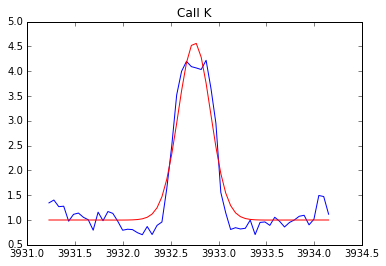

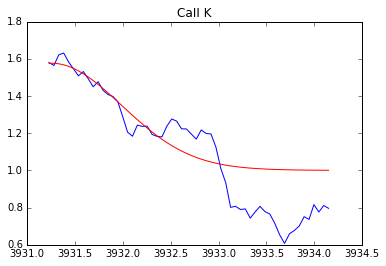

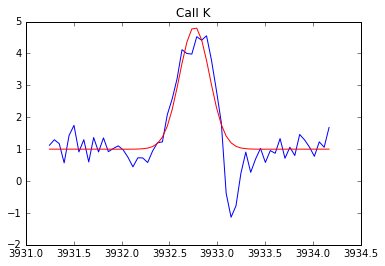

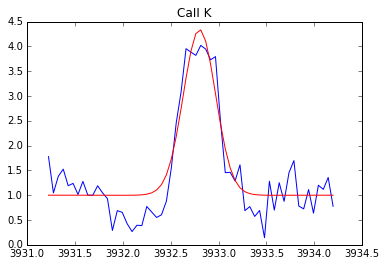

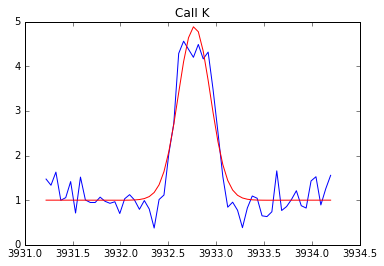

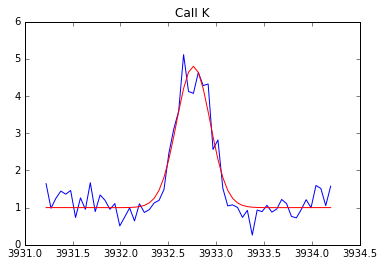

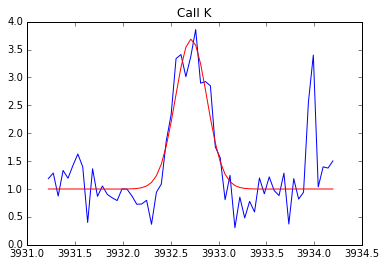

In [98]:
for spectrum in all_normalized_spectra:
    plt.figure()
    equivalent_width_k(spectrum)